In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix, log_loss, roc_curve

data = pd.read_csv("emails.csv")
X = data.iloc[:, 1:3001]
y = data.Prediction

def knn_cv(k, fold, X=X, y=y):
    start = (fold - 1) * 1000
    stop = (fold * 1000)
    X_train = X.drop(range(start, stop), axis=0)
    y_train = y.drop(range(start, stop), axis=0)
    X_test = X.iloc[start:stop, :]
    y_test = y.iloc[start:stop]
    model = knn(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print(fold, " & ", round(accuracy, 4), " & ", round(precision, 4), " & ", round(recall, 4), " \\\\")
    return(accuracy)

def sigma(z):
    return(1 / (1 + np.exp(-z)))

def cross_entropy_loss(theta, X, y):
    return(-np.inner(y, np.log(sigma(X.dot(theta)))) - np.inner((1 - y), np.log(1 - sigma(X.dot(theta)))))

def log_reg(X, y, step_size, max_it=100, stop_delta=10**-4):
    p = len(X.iloc[0, ])
    n = len(y)
    theta = np.zeros(p)
    it = 1
    loss_old = log_loss(y, sigma(X.dot(theta)))
    delta = stop_delta
    while (it <= max_it) & (delta >= stop_delta):
        theta_old = theta
        theta = theta_old - step_size * np.sum((X.T * (sigma(X.dot(theta_old)) - y)).T, axis = 0) / n
        loss = log_loss(y, sigma(X.dot(theta)))
        delta = abs(loss_old - loss)
        loss_old = loss
        if it % 100 == 0:
            print("it:", it, "delta:", delta, "cur_loss:", loss)
        it += 1
    return(theta)

def cv_log_reg(fold, X, y, step_size, max_it=100, stop_delta=10**-4):
    start = (fold - 1) * 1000
    stop = (fold * 1000)
    X_train = X.drop(range(start, stop), axis=0)
    y_train = y.drop(range(start, stop), axis=0)
    X_test = X.iloc[start:stop, :]
    y_test = y.iloc[start:stop]
    theta = log_reg(X_train, y_train, step_size, max_it=max_it, stop_delta=stop_delta)
    probs = sigma(X_test.dot(theta))
    predictions = [1 if x >= .5 else 0 for x in probs]
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print(fold, " & ", round(accuracy, 4), " & ", round(precision, 4), " & ", round(recall, 4), " \\\\")


if __name__ == '__main__':
    for i in range(1, 6):
        knn_cv(1, i)

    for i in range(1, 6):
        cv_log_reg(i, X, y, .0001, max_it=1000)

    k = [1, 3, 5, 7, 10]
    folds = [1, 2, 3, 4, 5]
    avg_acc = []
    for i in k:
        a = [knn_cv(i, x) for x in folds]
        print(i, "&", round(sum(a) / 5, 4), "\\\\")
        avg_acc.append(sum(a) / 5)

    plt.plot(k, avg_acc)
    plt.scatter(k, avg_acc)
    plt.title("kNN 5-Fold CV")
    plt.xlabel("k")
    plt.ylabel("Average Accuracy")
    plt.savefig("kNN_CV.png")
    pass

1  &  0.825  &  0.6545  &  0.8175  \\
2  &  0.853  &  0.6857  &  0.8664  \\
3  &  0.862  &  0.7212  &  0.838  \\
4  &  0.851  &  0.7164  &  0.8163  \\
5  &  0.775  &  0.6057  &  0.7582  \\
it: 100 delta: 0.0006006485111605953 cur_loss: 0.5566057786358978
it: 200 delta: 0.0003113181331784176 cur_loss: 0.5141790761987086
it: 300 delta: 0.00020890544374085884 cur_loss: 0.48889427839111627
it: 400 delta: 0.00015729360154126404 cur_loss: 0.4708559439560223
it: 500 delta: 0.00012628604831277368 cur_loss: 0.4568073754598347
it: 600 delta: 0.00010559544425842171 cur_loss: 0.4452862606554421
1  &  0.867  &  0.8276  &  0.6737  \\
it: 100 delta: 0.0006057785413003947 cur_loss: 0.5546024624222278
it: 200 delta: 0.0003131958817426117 cur_loss: 0.5118857006235257
it: 300 delta: 0.00021041333899163295 cur_loss: 0.48643703216585
it: 400 delta: 0.00015872689748486213 cur_loss: 0.4682527197048019


it: 100 delta: 0.0006349423659792741 cur_loss: 0.5425483973231146
it: 200 delta: 0.00032538421142003227 cur_loss: 0.49794559487943874
it: 300 delta: 0.0002165618235511757 cur_loss: 0.47162420199826943
it: 400 delta: 0.00016191335600046486 cur_loss: 0.45298911154682103
it: 500 delta: 0.00012913302562306272 cur_loss: 0.4385748760312896
it: 600 delta: 0.00010727879974625765 cur_loss: 0.4268315880381757


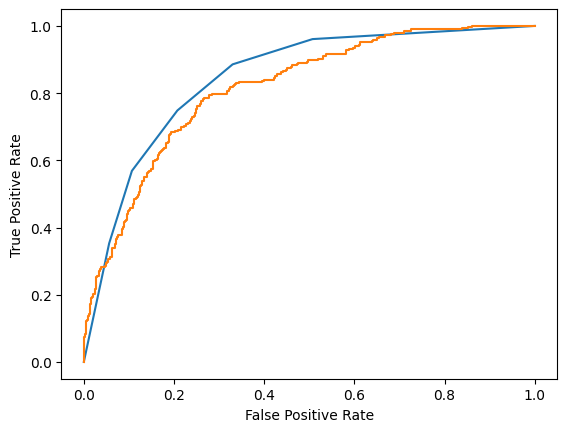

In [3]:
X_train = X.iloc[0:4000, ]
y_train = y.iloc[0:4000, ]
X_test = X.iloc[4000:5000, ]
y_test = y.iloc[4000:5000, ]
knn5= knn(n_neighbors=5)
knn5.fit(X_train, y_train)
knn_probs = knn5.predict_proba(X_test)
knn_pred = [i[1] for i in knn_probs]
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, knn_pred)
log_reg_coef = log_reg(X_train, y_train, .0001, max_it=1000)
log_reg_pred = sigma(X_test.dot(log_reg_coef))
fpr_log_reg, tpr_log_reg, thresh_log_reg = roc_curve(y_test, log_reg_pred)
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_log_reg, tpr_log_reg)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig("spam_roc.png")